# TCC PUC - Ciência de Dados e Big Data


# 1. Definição do Problema

Será feito uma coleta e análise de dados referente a anúncio de carros a venda.
Nosso objetivo é encontrar atributos com relevancia para identificar e classificar o anúncio de venda como um Bom Negócio ou um Mau Negócio para o comprador.

Os dados serão tratados e trabalhados e posteriormente aplicaremos algoritmos Machine Learning para verificar quais atributos tem maior relevancia na atribuição de um Bom Negócio ou um Mau Negócio para o usuário.

# 2. Coleta dos Dados

## 2.1 Extração dos Dados

Nessa seção será realizados todos os tratamentos necessários para obter os dados da fonte.

In [1]:
import json
import pandas as pd # lib pandas
import numpy as np # lib numpy
import datetime # lib datetime

import matplotlib.pyplot as plt # lib para utilização dos gráficos
import seaborn as sns # lib para exibir dados estátisticos

# Necessário para visualização automática dos gráficos no Jupyter
%matplotlib inline

from pathlib import Path
from pandas import json_normalize # package for flattening json in pandas df

# lib sklearn
from sklearn.model_selection import train_test_split # lib para definir os dados de treino e de teste
from sklearn.neighbors import KNeighborsClassifier # lib classe KNeighborsClassifier - Classificação 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve
from sklearn import preprocessing # Import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # lib classe RandomForestClassifier - Classificação 
from yellowbrick.classifier import ClassificationReport

# Abrindo arquivo json de coleta dos dados na fonte 
p = Path(r'C:\Users\karen\Desktop\TCC_PUC_BigData\data\data-cars.json')

# read json
with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())
                      
df_cars = json_normalize(data) # converte json
df_cars.head() # exibe DataFrame

,UniqueId,PhotoPath,ListingType,ProductCode,Channels,LongComment,FipePercent,IPVApaid,Licensed,Warranty,...,Seller.DealerScore,Seller.CarDelivery,Seller.TrocaComTroco,Seller.ExceededPlan,Prices.Price,Prices.SearchPrice,GoodDeal,VipAutopago,Prices.OldPrice,Media.Videos
0,34283122,2020\202009\20200925\land-rover-discovery-spor...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",? LAND ROVER - DIESEL\n???????????????\n?? Lan...,107.0,True,True,True,...,0,False,False,False,219999.0,219999.0,NaN,NaN,NaN,NaN
1,9532158,2021\202103\20210306\hyundai-azera-3.3-mpfi-gl...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",NaN,84.0,True,True,False,...,0,False,False,False,26500.0,26500.0,NaN,NaN,NaN,NaN
2,18996954,2017\201703\20170301\land-rover-discovery-4-3....,U,674,"[{'id': 48, 'Value': 'Webmotors'}]","Veiculo com 7 lugares, único dono, 4 pneus nov...",135.0,True,True,False,...,0,False,False,False,159900.0,159900.0,NaN,NaN,NaN,NaN
3,35205229,2020\202012\20201213\land-rover-discovery-4-5....,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",NaN,82.0,True,True,False,...,0,False,False,False,75500.0,75500.0,NaN,NaN,NaN,NaN
4,36073749,2021\202103\20210301\volkswagen-jetta-2.0-tsi-...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",NaN,88.0,True,True,False,...,0,False,False,False,45000.0,45000.0,True,NaN,NaN,NaN


In [2]:
# Abrindo arquivo json de coleta dos dados da tabela Fipe
p = Path(r'C:\Users\karen\Desktop\TCC_PUC_BigData\data\data-cars-fipe.json')

# read json
with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())
                      
df_cars_fipe = json_normalize(data)  # converte json
df_cars_fipe.head() # exibe DataFrame

,Fipe,UniqueId
0,206373.0,34283122.0
1,31520.0,9532158.0
2,118552.0,18996954.0
3,91943.0,35205229.0
4,51408.0,36073749.0


In [3]:
# Visualizando informações sobre os dados antes da formatação
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11976 entries, 0 to 11975
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   UniqueId                         11976 non-null  int64  
 1   PhotoPath                        11886 non-null  object 
 2   ListingType                      11976 non-null  object 
 3   ProductCode                      11976 non-null  object 
 4   Channels                         11976 non-null  object 
 5   LongComment                      11159 non-null  object 
 6   FipePercent                      11265 non-null  float64
 7   IPVApaid                         11976 non-null  bool   
 8   Licensed                         11976 non-null  bool   
 9   Warranty                         11976 non-null  bool   
 10  OnlyOwner                        11976 non-null  bool   
 11  Media.Photos                     11886 non-null  object 
 12  Specification.Titl

In [4]:
# Visualizando informações sobre os dados antes da formatação
df_cars_fipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11976 entries, 0 to 11975
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fipe      11976 non-null  float64
 1   UniqueId  11920 non-null  float64
dtypes: float64(2)
memory usage: 187.2 KB


Unindos datasets: anúncios de vendas de carro junto ao dataset de informações detalhadas do carro.

In [5]:
#Unindo os datasets infos detalhes do carro
df_cars = df_cars.join(df_cars_fipe.set_index('UniqueId')[['Fipe']], on='UniqueId')
df_cars.head()

,UniqueId,PhotoPath,ListingType,ProductCode,Channels,LongComment,FipePercent,IPVApaid,Licensed,Warranty,...,Seller.CarDelivery,Seller.TrocaComTroco,Seller.ExceededPlan,Prices.Price,Prices.SearchPrice,GoodDeal,VipAutopago,Prices.OldPrice,Media.Videos,Fipe
0,34283122,2020\202009\20200925\land-rover-discovery-spor...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",? LAND ROVER - DIESEL\n???????????????\n?? Lan...,107.0,True,True,True,...,False,False,False,219999.0,219999.0,NaN,NaN,NaN,NaN,206373.0
1,9532158,2021\202103\20210306\hyundai-azera-3.3-mpfi-gl...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",NaN,84.0,True,True,False,...,False,False,False,26500.0,26500.0,NaN,NaN,NaN,NaN,31520.0
2,18996954,2017\201703\20170301\land-rover-discovery-4-3....,U,674,"[{'id': 48, 'Value': 'Webmotors'}]","Veiculo com 7 lugares, único dono, 4 pneus nov...",135.0,True,True,False,...,False,False,False,159900.0,159900.0,NaN,NaN,NaN,NaN,118552.0
3,35205229,2020\202012\20201213\land-rover-discovery-4-5....,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",NaN,82.0,True,True,False,...,False,False,False,75500.0,75500.0,NaN,NaN,NaN,NaN,91943.0
4,36073749,2021\202103\20210301\volkswagen-jetta-2.0-tsi-...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",NaN,88.0,True,True,False,...,False,False,False,45000.0,45000.0,True,NaN,NaN,NaN,51408.0


# 3. Tratamento dos Dados

Nessa seção é analisado os dados que são necessários para continuidade do trabalho.
Os dados necessários serão formatados e/ou utilizado filtros se necessário.
Os dados que não forem necessários serão removidos.

## 3.1 Dados dos Carros

Removendo colunas desnecessárias

In [6]:
del df_cars['Channels'] # Coluna Channels - Canal de origem da venda
del df_cars['ListingType'] # Coluna Tipo de Listagem
del df_cars['ProductCode'] # Coluna Código Produto
del df_cars['PhotoPath'] # Coluna PhotoPath
del df_cars['FipePercent'] # Coluna FipePercent
del df_cars['LongComment'] # Coluna LongComment - comentários do vendedor

del df_cars['VipAutopago'] # Coluna VipAutopago

# Group - Media
del df_cars['Media.Photos'] # Coluna Media.Photos
del df_cars['Media.Videos'] # Coluna Media.Videos

# Group - Seller
del df_cars['Seller.Id'] # Coluna tipo de venda Id
del df_cars['Seller.SellerType'] # Coluna tipo de venda Id (PF, PJ)
del df_cars['Seller.AdType.id'] # Coluna tipo de venda Id (Pessoa Física, Pessoa Jurídica)
del df_cars['Seller.AdType.Value'] # Coluna tipo de venda Value (Pessoa Física, Pessoa Jurídica)
del df_cars['Seller.CarDelivery'] # Coluna Entrega do Carro (true, false)
del df_cars['Seller.TrocaComTroco'] # Coluna Seller.TrocaComTroco
del df_cars['Seller.BudgetInvestimento'] # Coluna BudgetInvestimento
del df_cars['Seller.DealerScore'] # Coluna DealerScore
del df_cars['Seller.City'] # Coluna Seller.City
del df_cars['Seller.State'] # Coluna Seller.State
del df_cars['Seller.ExceededPlan'] # Coluna Seller.ExceededPlan
#del df_cars['Prices.OldPrice'] # Coluna Prices.OldPrice

# Group - Prices
del df_cars['Prices.SearchPrice'] # Coluna Prices.SearchPrice valor utilizado no campo busca do site

# Group - Specification
del df_cars['Specification.NumberPorts'] # Coluna NumberPorts
del df_cars['Specification.Transmission'] # Coluna Transmission
del df_cars['Specification.Make.id'] # Coluna Specification.Make.id
del df_cars['Specification.Version.id'] # Coluna Specification.Version.id
del df_cars['Specification.Version.Value'] # Coluna Specification.Version.Value
del df_cars['Specification.Model.id'] # Coluna Especificação do Modelo Id
del df_cars['Specification.Color.IdPrimary'] # Coluna Specification.Color.IdPrimary id da cor
del df_cars['Specification.VehicleAttributes'] # Coluna Specification.VehicleAttributes (atributos já organizados em forma de colunas)
del df_cars['Specification.YearFabrication'] # Coluna Specification.YearFabrication, consideraremos o ano do Modelo do carro
del df_cars['Specification.BodyType'] # Coluna BodyType
del df_cars['Specification.Title'] # Coluna Title

Renomeando o nome das colunas

In [7]:
df_cars.rename({'Specification.Make.Value': 'Make',
                'Specification.Model.Value': 'Model',
                'Specification.Version.Value': 'Version',
                'Specification.YearModel': 'YearModel',
                'Specification.YearFabrication': 'YearFabrication',
                'Specification.Odometer': 'Odometer',
                'Specification.Armored': 'Armored',
                'Prices.Price': 'Price',
                'Prices.OldPrice': 'OldPrice',
                'Specification.Color.Primary': 'Color',
                'Specification.Armored': 'Armored',
               }, axis=1, inplace=True)

Formatando os dados

In [8]:
df_cars_fipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11976 entries, 0 to 11975
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fipe      11976 non-null  float64
 1   UniqueId  11920 non-null  float64
dtypes: float64(2)
memory usage: 187.2 KB


Realizando a conversão do tipo dos dados

In [9]:
# Convertendo o ano de Float64 para Int64 (obs: o ano modelo está vindo como float 1 casa decimal)
df_cars['YearModel'] = df_cars['YearModel'].astype('int64')

# Convertendo dados que estão como object para string
df_cars['Make'] = df_cars['Make'].astype('string')
df_cars['Model'] = df_cars['Model'].astype('string')
df_cars['Armored'] = df_cars['Armored'].astype('string')

Verificando se existe algum anúncio onde não foi possível obter o valor Fipe do carro. Ou seja, está com o valor zerado. 

In [10]:
df_cars['Fipe'][df_cars['Fipe'] == 0].count()

711

Vamos considerar apenas os carros que estão com o valor Fipe acima de zero. Ou seja foi encontrado um valor válido de tabela Fipe do carro.

In [11]:
# Seleciona os carros que estão com o valor Fipe em <= 0
df_cars_fipe_ok = df_cars[(df_cars['Fipe'].isnull()) | (df_cars['Fipe'] <= 0)]

# Remove os registros que estão com o Fipe <= e considera apenas os que estão com Fipe > 0
df_cars = df_cars.drop(df_cars_fipe_ok.index, axis=0) 

Caso a coluna OldPrice estiver nula, vamos considerar que não houve um ajuste de preço no anúncio e colocaremos o OldPrice com o mesmo valor de Price.

In [12]:
df_cars['OldPrice'].loc[df_cars['OldPrice'].isnull()] = df_cars['Price']

C:\Users\karen\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Caso a coluna GoodDeal estiver nula, vamos considerar False.

In [13]:
df_cars['GoodDeal'].loc[df_cars['GoodDeal'].isnull()] = False

Exibindo número de registros nulos em cada coluna. Neste caso os valores estão zerados, pois não existe nenhum valor nulo nas colunas.

In [14]:
#Verifica se existe algum valor nulo após o tratamento dos dados
df_cars.isnull().sum()

UniqueId     0
IPVApaid     0
Licensed     0
Warranty     0
OnlyOwner    0
Make         0
Model        0
YearModel    0
Odometer     0
Armored      0
Color        0
Price        0
GoodDeal     0
OldPrice     0
Fipe         0
dtype: int64

Exibindo informações sobre o dataframe como nome da coluna, quantidade de registros nulos, quantidade de registros que não estão nulos e o tipo da coluna.

In [15]:
# Visualizando informações sobre os dados já formatados
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11209 entries, 0 to 11975
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UniqueId   11209 non-null  int64  
 1   IPVApaid   11209 non-null  bool   
 2   Licensed   11209 non-null  bool   
 3   Warranty   11209 non-null  bool   
 4   OnlyOwner  11209 non-null  bool   
 5   Make       11209 non-null  string 
 6   Model      11209 non-null  string 
 7   YearModel  11209 non-null  int64  
 8   Odometer   11209 non-null  float64
 9   Armored    11209 non-null  string 
 10  Color      11209 non-null  object 
 11  Price      11209 non-null  float64
 12  GoodDeal   11209 non-null  object 
 13  OldPrice   11209 non-null  float64
 14  Fipe       11209 non-null  float64
dtypes: bool(4), float64(4), int64(2), object(2), string(3)
memory usage: 1.4+ MB


Exibindo informações sobre o tipo de cada coluna.

In [16]:
# Visualizando informações sobre os dados já formatados (tipos de dados)
df_cars.dtypes

UniqueId       int64
IPVApaid        bool
Licensed        bool
Warranty        bool
OnlyOwner       bool
Make          string
Model         string
YearModel      int64
Odometer     float64
Armored       string
Color         object
Price        float64
GoodDeal      object
OldPrice     float64
Fipe         float64
dtype: object

# 4. Análise e Exploração dos Dados 

Nessa seção será feito uma análise sobre os dados coletados

## 4.1 Analisando os Dados

Exibindo a dimensão do DataFrame. Logo percebe-se que teremos 11209 linhas e 15 colunas.

In [17]:
df_cars.shape

(11209, 15)

Exibe o valor total de carros que estão abaixo da tabela Fipe e IPVA Pago.

In [18]:
# Carros que estão abaixo da tabela FIPE e IPVA Pago
cars = (df_cars['Price'] <= df_cars['Fipe']) & (df_cars['IPVApaid'])

# Utilizando a função shape para pegar o tamanho de linhas do DataFrame com o filtro de carros
df_cars[cars].shape[0]

1304

In [19]:
# Carros que estão acima da tabela FIPE 
cars = (df_cars['Price'] > df_cars['Fipe'])

# Utilizando a função shape para pegar o tamanho de linhas do DataFrame com o filtro de carros
df_cars[cars].shape[0]

9138

Exibe as colunas Fipe e Price dos carros que estão acima da tabela FIPE

In [20]:
# Carros que estão acima da tabela FIPE
cars = (df_cars['Price'] > df_cars['Fipe']) 
df_cars[cars][['Fipe', 'Price']]

,Fipe,Price
0,206373.0,219999.0
2,118552.0,159900.0
7,25991.0,29900.0
9,95229.0,115000.0
13,126460.0,134900.0
...,...,...
11970,58464.0,65990.0
11972,98242.0,118880.0
11973,48609.0,53990.0
11974,38175.0,42290.0


Criando colunas PriceFipeOk e Year>10Years que auxiliará na verificação se o carro é ou não um bom negócio

In [21]:
# Essa coluna identificará se o valor do carro está acima ou abaixo do valor da tabela Fipe (True-sim, False-não)
df_cars['PriceFipeOk'] = (df_cars['Price'] <= df_cars['Fipe']) 

# Essa coluna identificará se o veículo tem mais de 10 anos (True- sim, False-não)
now = datetime.datetime.now() # Pega a data atual 

df_cars['Year>10Years'] = (now.year - df_cars['YearModel'] > 10) # verifica se a diferença do ano é superior a 10

df_cars.head()

,UniqueId,IPVApaid,Licensed,Warranty,OnlyOwner,Make,Model,YearModel,Odometer,Armored,Color,Price,GoodDeal,OldPrice,Fipe,PriceFipeOk,Year>10Years
0,34283122,True,True,True,True,LAND ROVER,DISCOVERY SPORT,2018,23000.0,N,Cinza,219999.0,False,219999.0,206373.0,False,False
1,9532158,True,True,False,True,HYUNDAI,AZERA,2010,71496.0,N,Preto,26500.0,False,26500.0,31520.0,True,True
2,18996954,True,True,False,True,LAND ROVER,DISCOVERY 4,2013,97411.0,N,Preto,159900.0,False,159900.0,118552.0,False,False
3,35205229,True,True,False,True,LAND ROVER,DISCOVERY 4,2011,107200.0,S,Preto,75500.0,False,75500.0,91943.0,True,False
4,36073749,True,True,False,True,VOLKSWAGEN,JETTA,2012,92000.0,N,Branco,45000.0,True,45000.0,51408.0,True,False


Exibindo Resumo Estatístico do DataFrame carros.

Teremos como resultado um DataFrame com as colunas count a frequência; mean a média; std o desvio padrão; min
 valor mínimo; 25% o primeiro quartio, 50% a mediana, 75% o terceiro quartio e max, o valor máximo.

In [22]:
# Utilizando a função describe para exibir as Estatísticas descritivas das colunas
df_cars.describe().round(2)

,UniqueId,YearModel,Odometer,Price,OldPrice,Fipe
count,11209.00,11209.00,11209.00,11209.00,11209.00,11209.00
mean,34810534.04,2016.55,59045.87,110560.34,110561.41,83973.96
std,3719016.56,5.08,56160.48,998500.56,998500.50,95139.47
min,4369950.00,1985.00,0.00,6000.00,6000.00,2380.00
25%,35396411.00,2014.00,26980.00,47790.00,47790.00,43647.00
50%,35904828.00,2019.00,47064.00,66900.00,66900.00,61667.00
75%,36075268.00,2020.00,80700.00,99990.00,99990.00,93200.00
max,36156739.00,2022.00,2039882.00,75000000.00,75000000.00,3100000.00


### Coluna GoodDeal (Bom Negócio)

Exibindo um agrupamento de registros pela coluna GoodDeal

In [23]:
# Agrupa por GoodDeal e remove o index (GoodDeal)
cars_group_good_deal = df_cars.groupby(['GoodDeal'], as_index=False)

# Exibe colunas:
# GoodDeal: valor único (agrupado)
# UniqueId: quantidade de registros 
cars_group_good_deal = cars_group_good_deal.agg({'GoodDeal': np.unique, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para apresentá-las
cars_group_good_deal = cars_group_good_deal.rename(columns={'GoodDeal':'Bom Negócio', 'UniqueId': 'Quantidade'})

# Alterando os valores das linhas da coluna Bom Negócio para o label text
# obs: Isso facilitará no uso do gráfico logo abaixo
cars_group_good_deal.loc[cars_group_good_deal['Bom Negócio'] == True, ['Bom Negócio']] = 'Bom Negócio'
cars_group_good_deal.loc[cars_group_good_deal['Bom Negócio'] == False, ['Bom Negócio']] = 'Pode não ser um Bom Negócio'

# Calculando a Porcentagem da coluna Quantidade 
# obs: Essa coluna será usada no gráfico abaixo
cars_group_good_deal['Porcentagem'] = (cars_group_good_deal['Quantidade'] / cars_group_good_deal['Quantidade'].sum()) * 100

# ordena o Dataframe para apresentar primeiro os valores Valor > Fipe e posteriormente Valor <= Fipe
# obs: isso garantirá no gráfico esta ordem para utilização da configuração de cores
cars_group_good_deal = cars_group_good_deal.sort_values(by=['Bom Negócio'], ascending=False)

cars_group_good_deal

,Bom Negócio,Quantidade,Porcentagem
0,Pode não ser um Bom Negócio,10466,93.371398
1,Bom Negócio,743,6.628602


Selecionando os anúncios considerados Bom Negócio = True e o Preço Fipe OK

In [24]:
(df_cars['PriceFipeOk'] & df_cars['GoodDeal']).sum()

743

Selecionando os anúncios considerados Bom Negócio = True e o onde o preço incial do anúncio foi ajustado

In [25]:
((df_cars['OldPrice'] < df_cars['Price']) & df_cars['GoodDeal']).sum()

0

Exibe a tabela com o Preço Médio e a Quantidade de carros da marca.

In [26]:
# Agrupa e exibe carros pelo preço médio de cada marca.
cars_group_make_mean = df_cars.groupby(['Make'], as_index=False)

# Exibe colunas:
# Model: valor único (agrupado)
# Preço: média de preço daquela Marca 
cars_group_make_mean = cars_group_make_mean.agg({'Price':np.mean, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para apresentá-las
cars_group_make_mean = cars_group_make_mean.rename(columns={'Make':'Marca','Price':'Preço Médio', 'UniqueId': 'Quantidade'})

# Ordenando em ordem Decrescente pela coluna modelo
cars_group_make_mean = cars_group_make_mean.sort_values('Marca', ascending=True)

cars_group_make_mean

,Marca,Preço Médio,Quantidade
0,ALFA ROMEO,59708.33,12
1,ASTON MARTIN,520000.00,1
2,AUDI,181651.93,291
3,BMW,186277.03,346
4,CHERY,108409.11,125
5,CHEVROLET,60701.00,1432
6,CHRYSLER,49100.74,27
7,CITROËN,48193.03,253
8,DODGE,70395.83,36
9,FERRARI,1654750.00,4


Exibe um Gráfico com a Quantidade de carros de cada Marca.

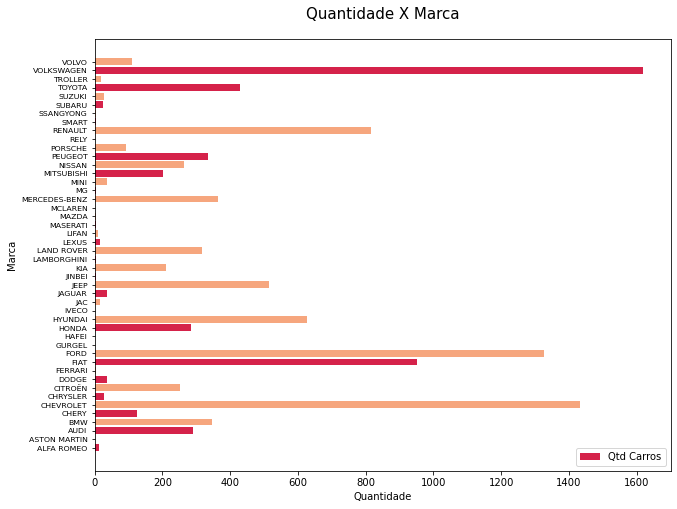

In [27]:
# Gráfico Quantidade de Carros de cada Marca

# Pega o resultado do agrupamento (Preço Médio + Modelo) para exibir no gráfico
fig = plt.figure(figsize=(8,6))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices das marcas
indice = np.arange(len(cars_group_make_mean))

eixo.barh(indice, cars_group_make_mean['Quantidade'].round(), align='center', height=0.8,  tick_label=cars_group_make_mean['Marca'], color=["#d5224a", '#f6a67e'])

# Alterando Título e Labels
eixo.set_title('Quantidade X Marca', fontsize=15, pad=20)
eixo.set_xlabel('Quantidade')
eixo.set_ylabel('Marca')

eixo.set_yticks(indice)
eixo.set_yticklabels(cars_group_make_mean['Marca'], fontsize=7.8)

# Adicionando Legenda
eixo.legend(['Qtd Carros'], loc = 'lower right')

Exibe tabela agrupando Modelo, Ano Modelo, Km Médio e Quantidade de cada modelo.

In [28]:
# Agrupa e exibe carros pelo número médio de km rodados por ano por modelo
cars_group_model_mean_km_year = df_cars.groupby(['Model', 'YearModel'], as_index=False)

# Exibe colunas:
# Model: valor único (agrupado)
# YearModel: valor único (agrupado)
# Odometer: média de km daquele modelo 
cars_group_model_mean_km_year = cars_group_model_mean_km_year.agg({'Odometer':np.mean, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para apresentá-las
cars_group_model_mean_km_year = cars_group_model_mean_km_year.rename(columns={'Model':'Modelo', 'YearModel':'Ano Modelo','Odometer':'Km Médio', 'UniqueId': 'Quantidade'})

cars_group_model_mean_km_year.head()

,Modelo,Ano Modelo,Km Médio,Quantidade
0,116i,2014,49000.00,1
1,116i,2015,87795.67,3
2,118i,2010,88333.33,3
3,118i,2012,88000.00,1
4,118i,2013,60869.50,2


Selecionando apenas os carros que houve uma baixa no preço inicial do anúncio.

In [29]:
# Agrupa os carros por Marca, somente os que houve uma alteração do preço para um menor valor

# Agrupa por Make
cars_group_make_old_price = df_cars[df_cars['OldPrice'] > df_cars['Price']].groupby(['Make'], as_index=False)

# Exibe colunas:
# UniqueId: quantidade de registros 
cars_group_make_old_price = cars_group_make_old_price.agg({ 'UniqueId': np.size}).round(2)

# Renomeando as colunas para apresentá-las 
cars_group_make_old_price = cars_group_make_old_price.rename(columns={'Make':'Marca', 'UniqueId':'Quantidade'})

cars_group_make_old_price

,Marca,Quantidade
0,AUDI,1
1,CHEVROLET,1
2,CITROËN,1
3,FIAT,1
4,FORD,1
5,HONDA,1
6,HYUNDAI,4
7,NISSAN,1
8,PEUGEOT,1
9,VOLKSWAGEN,1


Exibindo gráfico Marca X Quantidade apenas dos carros que houve alteração de dimuição do preço inicial do anúncio.

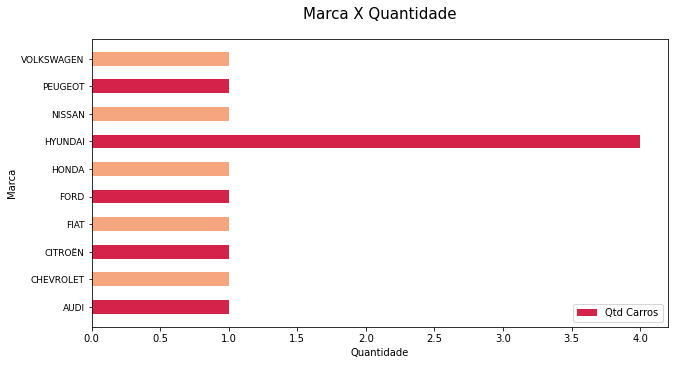

In [30]:
# Gráfico Marca X Quantidade

# Pega o resultado do agrupamento (Marca e Qtd de registros) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices das marcas
indice = np.arange(len(cars_group_make_old_price))

eixo.barh(indice, cars_group_make_old_price['Quantidade'].round(), align='center', height=0.5,  tick_label=cars_group_make_old_price['Marca'], color=["#d5224a", '#f6a67e'])

# Alterando Título e Labels
eixo.set_title('Marca X Quantidade', fontsize=15, pad=20)
eixo.set_xlabel('Quantidade')
eixo.set_ylabel('Marca')

eixo.set_yticks(indice)
eixo.set_yticklabels(cars_group_make_old_price['Marca'], fontsize=9)

# Adicionando Legenda
eixo.legend(['Qtd Carros'], loc = 'lower right')

Exibe a tabela com o Ano, Km e Quantidade de carros por ano.

In [31]:
# Agrupa os carros por Ano e Calcula a Média e a Quantidade por Ano

# Agrupa por ano e remove o index (YearModel)
cars_group_mean_year = df_cars.groupby(['YearModel'], as_index=False)

# Exibe colunas:
# YearModel: valor único (agrupado)
# Odometer: média de valores (Km)
# UniqueId: quantidade de registros 
cars_group_mean_year = cars_group_mean_year.agg({'YearModel': np.unique, 'Odometer':np.mean, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para apresentá-las
cars_group_mean_year = cars_group_mean_year.rename(columns={'YearModel':'Ano','Odometer':'Km', 'UniqueId': 'Quantidade'})

# Ordenando em ordem Decrescente pela coluna ano
cars_group_mean_year = cars_group_mean_year.sort_values('Ano', ascending=False)
#.reset_index()

cars_group_mean_year.head()

,Ano,Km,Quantidade
37,2022,5.96,100
36,2021,2333.54,1218
35,2020,34938.99,2797
34,2019,38896.65,1553
33,2018,51397.67,811


Exibe Gráfico agrupando a Quilometragem e Ano dos carros.

Neste gráfico foi considerado apenas os carros com ano entre [2000 - Ano Atual]. Percebemos que quanto mais tempo em anos o carro tem, a quilometragem é proporcional ao uso.

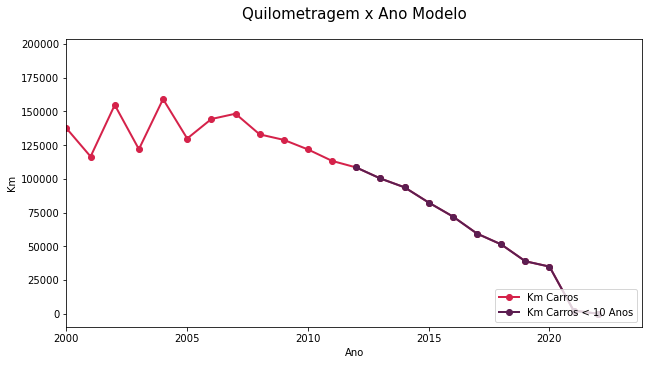

In [32]:
# Gráfico variação de Quilometragem e Ano do carro

# Pega o resultado do agrupamento (Ano + Quilometragem) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando gráfico
eixo.plot(cars_group_mean_year['Ano'], cars_group_mean_year['Km'], color= '#d5224a', lw=2, marker = 'o')

# Exibe no gráfico somente os carros entre [2000 - Ano Atual]
eixo.set_xlim(2000) # a partir de 2000

# Adicionando cor de destaque para carros que ainda estão entre 10 anos 
cars_10_years = now.year - cars_group_mean_year['Ano']  < 10
eixo.plot(cars_group_mean_year[cars_10_years]['Ano'], cars_group_mean_year[cars_10_years]['Km'], color= '#5c1e51', lw=2, marker = 'o')

# Alterando Título e Labels
eixo.set_title('Quilometragem x Ano Modelo', fontsize=15, pad=20)
eixo.set_ylabel('Km')
eixo.set_xlabel('Ano')

# Adicionando Legenda
eixo.legend(['Km Carros', 'Km Carros < 10 Anos'], loc = 'lower right')

### Preço Fipe (OK ou Não) das 10 Maiores Marcas

Exibe tabela agrupando as marcas e se o valor da tabela Fipe está OK ou não. 

Consideramos apenas os valores das 10 maiores marcas de carros, eleitos pela https://www.noticiasautomotivas.com.br/marcas-de-carro-as-10-maiores-e-melhores-do-mundo/. Pois logo abaixo será mostrado um gráfico de relação dos valores, e por isso escolhemos apenas alguns registros, pois seriam melhor exibidos no gráfico.

In [33]:
# Agrupa os carros por Make e quantidade de carros com PriceFipeOk (True or False)
# obs: Consideremos apenas as 10 maiores marcas de carro 
make_top_10 = ['TOYOTA','VOLKSWAGEN','FORD','HONDA','NISSAN','HYUNDAI','CHEVROLET','KIA','MERCEDES-BENZ','BMW']

# Agrupa por marca e remove o index (Make)  
cars_group_make_fipe = pd.get_dummies(df_cars, columns=['PriceFipeOk']).groupby(['Make'], as_index=False).sum()

# Renomeando as colunas para apresentá-las 
cars_group_make_fipe = cars_group_make_fipe.rename(columns={'Make':'Marca', 'PriceFipeOk_True':'Preço Fipe OK', 'PriceFipeOk_False':'Preço Fipe Não OK'})

# Exibe colunas:
# Make: valor único (agrupado)
# PriceFipeOk_True: quantidade de registros Preço Fipe OK
# PriceFipeOk_False: quantidade de registros Preço Fipe Não OK
cars_group_make_fipe = cars_group_make_fipe[['Marca', 'Preço Fipe OK', 'Preço Fipe Não OK']]

# Pega apenas os registros que estão com o Preço Fipe OK (PriceFipeOk) e que estão entre as 10 maiores marcas veículos
cars_group_make_fipe = cars_group_make_fipe[(cars_group_make_fipe['Marca'].isin(make_top_10))]

cars_group_make_fipe

,Marca,Preço Fipe OK,Preço Fipe Não OK
3,BMW,86.0,260.0
5,CHEVROLET,164.0,1268.0
11,FORD,306.0,1021.0
14,HONDA,29.0,256.0
15,HYUNDAI,64.0,562.0
21,KIA,38.0,173.0
29,MERCEDES-BENZ,80.0,285.0
33,NISSAN,44.0,220.0
42,TOYOTA,48.0,381.0
44,VOLKSWAGEN,182.0,1437.0


Exibe Gráfico Relação das Marcas e Preço Fipe OK e Fipe não OK.

Consideramos apenas as 10 maiores marcas.

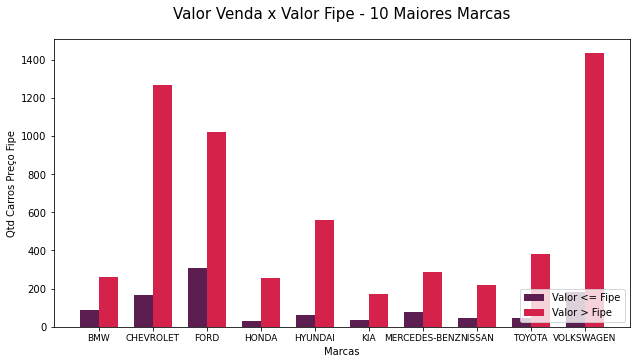

In [34]:
# Gráfico variação de Marcas e Preço Fipe

# Pega o resultado do agrupamento (Marca + Preço Fipe) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices das marcas
indice = np.arange(len(cars_group_make_fipe))

width = 0.35  # tamanho das barras

# Adicionando barras Preço <= Valor Fipe
eixo.bar(indice - width/2, cars_group_make_fipe['Preço Fipe OK'], width, color= '#5c1e51')

# Adicionando barras Preço > Valor Fipe
eixo.bar(indice + width/2, cars_group_make_fipe['Preço Fipe Não OK'], width, color= '#d5224a')

# Alterando Título e Labels
eixo.set_title('Valor Venda x Valor Fipe - 10 Maiores Marcas', fontsize=15, pad=20)
eixo.set_xlabel('Marcas')
eixo.set_ylabel('Qtd Carros Preço Fipe')

eixo.set_xticks(indice)
eixo.set_xticklabels(cars_group_make_fipe['Marca'], fontsize=9)

# Adicionando Legenda
eixo.legend(['Valor <= Fipe', 'Valor > Fipe'], loc = 'lower right')

Exibe tabela com a Quantidade e Porcentagem de carros com o Valor Fipe Ok e não OK.

In [35]:
# Agrupa os carros onde PriceFipeOk (o valor está <= ao valor da tabela Fipe ou valor > valor da tabela Fipe)

# Fazer agrupamento somente com carros com ano <= 10 anos
cars_10_years = now.year - df_cars['YearModel']  <= 10

# Agrupa por PriceFipeOk e remove o index (PriceFipeOk)
# somente para carros onde ano <= 10
cars_group_fipe_10_years = df_cars[cars_10_years].groupby(['PriceFipeOk'], as_index=False)

# Exibe colunas:
# PriceFipeOk: valor único (agrupado)
# UniqueId: quantidade de registros 
cars_group_fipe_10_years = cars_group_fipe_10_years.agg({'PriceFipeOk': np.unique, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para apresentá-las
cars_group_fipe_10_years = cars_group_fipe_10_years.rename(columns={'PriceFipeOk':'Preço Fipe OK', 'UniqueId': 'Quantidade'})


# Alterando os valores das linhas da coluna Preço Fipe OK para o label text
# obs: Isso facilitará no uso do gráfico logo abaixo
cars_group_fipe_10_years.loc[cars_group_fipe_10_years['Preço Fipe OK'] == True, ['Preço Fipe OK']] = 'Valor <= Fipe'
cars_group_fipe_10_years.loc[cars_group_fipe_10_years['Preço Fipe OK'] == False, ['Preço Fipe OK']] = 'Valor > Fipe'

# Calculando a Porcentagem da coluna Quantidade 
# obs: Essa coluna será usada no gráfico abaixo
cars_group_fipe_10_years['Porcentagem'] = (cars_group_fipe_10_years['Quantidade'] / cars_group_fipe_10_years['Quantidade'].sum()) * 100

# ordena o Dataframe para apresentar primeiro os valores Valor > Fipe e posteriormente Valor <= Fipe
# obs: isso garantirá no gráfico esta ordem para utilização da configuração de cores
cars_group_fipe_10_years = cars_group_fipe_10_years.sort_values(by=['Preço Fipe OK'], ascending=False)

cars_group_fipe_10_years

,Preço Fipe OK,Quantidade,Porcentagem
0,Valor > Fipe,8366,82.496795
1,Valor <= Fipe,1775,17.503205


Exibe Gráfico de Preço Fipe e Porcentagem de carros

Text(0.5, 1.0, 'Porcentagem de Carros x Preço Fipe (até 10 anos)')

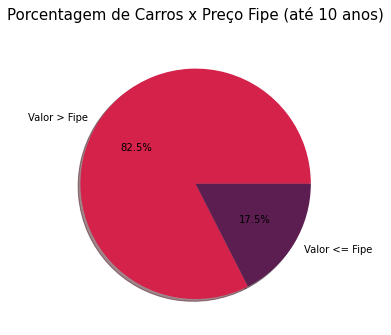

In [36]:
# Gráfico Quantidade de Carros Preço Fipe (valor <= valor Fipe e valor > valor Fipe)

# Pega o resultado do agrupamento (Marca + Preço Fipe) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.pie(cars_group_fipe_10_years['Porcentagem'], labels=cars_group_fipe_10_years['Preço Fipe OK'], autopct='%.1f%%', colors=['#d5224a', '#5c1e51'], shadow=True)

# Alterando Título e Labels
eixo.set_title('Porcentagem de Carros x Preço Fipe (até 10 anos)', fontsize=15, pad=20)

Adicionando coluna OdometerRecommended. Consideremos como um carro com quilometragem recomendada se a média de quilometragem por ano for <= 15.000 km rodados.

In [37]:
df_cars['OdometerRecommended'] = (df_cars['Odometer'] / (now.year - df_cars['YearModel']) < 15000)
df_cars

,UniqueId,IPVApaid,Licensed,Warranty,OnlyOwner,Make,Model,YearModel,Odometer,Armored,Color,Price,GoodDeal,OldPrice,Fipe,PriceFipeOk,Year>10Years,OdometerRecommended
0,34283122,True,True,True,True,LAND ROVER,DISCOVERY SPORT,2018,23000.0,N,Cinza,219999.0,False,219999.0,206373.0,False,False,True
1,9532158,True,True,False,True,HYUNDAI,AZERA,2010,71496.0,N,Preto,26500.0,False,26500.0,31520.0,True,True,True
2,18996954,True,True,False,True,LAND ROVER,DISCOVERY 4,2013,97411.0,N,Preto,159900.0,False,159900.0,118552.0,False,False,True
3,35205229,True,True,False,True,LAND ROVER,DISCOVERY 4,2011,107200.0,S,Preto,75500.0,False,75500.0,91943.0,True,False,True
4,36073749,True,True,False,True,VOLKSWAGEN,JETTA,2012,92000.0,N,Branco,45000.0,True,45000.0,51408.0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,34269733,True,True,False,False,CHEVROLET,COBALT,2019,50000.0,N,Cinza,59700.0,False,59700.0,60230.0,True,False,False
11972,36115810,False,True,True,True,VOLKSWAGEN,NIVUS,2021,0.0,N,Cinza,118880.0,False,118880.0,98242.0,False,False,False
11973,36115143,True,True,False,True,FIAT,ARGO,2020,35113.0,N,Preto,53990.0,False,53990.0,48609.0,False,False,False
11974,36111820,True,True,False,True,RENAULT,KWID,2020,29778.0,N,Branco,42290.0,False,42290.0,38175.0,False,False,False


Relação da coluna GoodDeal com a coluna OdometerRecommended

In [38]:
(df_cars['OdometerRecommended'] & df_cars['GoodDeal']).sum()

281

## 4.2 Correlação

Nessa seção será apresentando os resultados relacionados a correlação entre os atributos do DataFrame.

A relação entre duas variáveis ​​é chamada de correlação. Em estatística, o método mais comum para calcular a correlação é o coeficiente de correlação de Pearson. Pode ter três valores da seguinte forma:

* Valor do coeficiente = 1 - Representa a correlação positiva total entre as variáveis.
* Valor do coeficiente = -1 - Representa a correlação negativa total entre as variáveis.
* Valor do coeficiente = 0 - Não representa nenhuma correlação entre as variáveis.

É sempre bom revisarmos as correlações de pares dos atributos em nosso conjunto de dados antes de usá-lo no projeto de ML, porque alguns algoritmos de aprendizado de máquina, como regressão linear e regressão logística, terão um desempenho ruim se tivermos atributos altamente correlacionados. 

Em Python, podemos calcular facilmente uma matriz de correlação de atributos de conjunto de dados com a ajuda da função corr () no Pandas DataFrame.

### 4.2.1 Matriz de Correlação

Preparando os dados que serão utilizados na análise. Neste momento já estamos preparando os dados para a classificação e excluindo alguns atributos que não são relevantes, isso facilitará na nossa análise.

In [39]:
# Fazendo uma cópia do dataframe original
df_cars_class = df_cars.copy()

# Deletando atributos que não serão utilizados
del df_cars_class['UniqueId']
del df_cars_class['Make']
del df_cars_class['Model']
del df_cars_class['Licensed']

del df_cars_class['Year>10Years']

# Convertendo o tipo dos atributos
df_cars_class['OdometerRecommended'] = df_cars_class['OdometerRecommended'].astype('int64')
df_cars_class['IPVApaid'] = df_cars_class['IPVApaid'].astype('int64')
#df_cars_class['Licensed'] = df_cars_class['Licensed'].astype('int64')
df_cars_class['Warranty'] = df_cars_class['Warranty'].astype('int64')
df_cars_class['OnlyOwner'] = df_cars_class['OnlyOwner'].astype('int64')
df_cars_class['PriceFipeOk'] = df_cars_class['PriceFipeOk'].astype('int64')
#df_cars_class['Year>10Years'] = df_cars_class['Year>10Years'].astype('int64')

# Convertendo dados categóricos em numéricos
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df_cars_class['Armored']=le.fit_transform(df_cars_class['Armored'])
df_cars_class['Color']=le.fit_transform(df_cars_class['Color'])

Antes de aplicarmos os algoritmos de Machine Learning, iremos realizar algumas análises sobre os dados.

Para determinar a correlação dos atributos usaremos em forma gráfica a Matriz de Correlação.

Text(-21.000000000000007, 0.5, 'características do núcleo da célula')

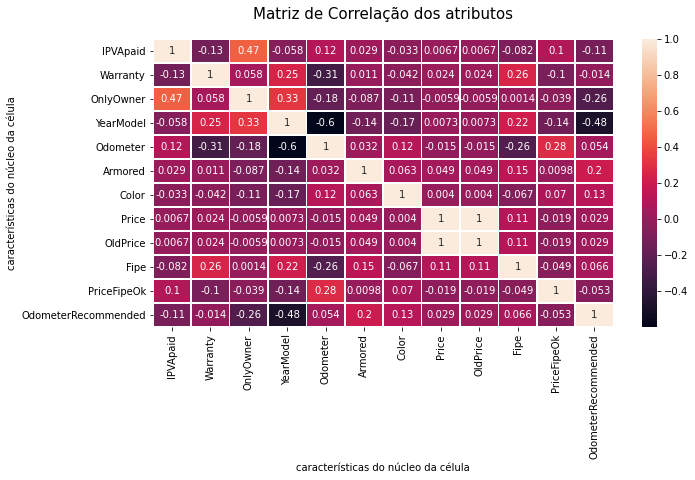

In [40]:
# Gráfico de Matriz de Correlação 
df_small = df_cars_class.copy()

# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = df_small.corr(method='pearson')

# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)

# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")


Consideremos o seguinte entendimento para a Matriz de correlação:
    
* Cada célula da grade representa o valor do coeficiente de correlação entre duas variáveis.
* O valor na posição (a, b) representa o coeficiente de correlação entre os recursos na linha a e coluna b. Isso será igual ao valor na posição (b, a)
* É uma   matriz quadrada - cada linha representa uma variável e todas as colunas representam as mesmas variáveis ​​que linhas, portanto, o número de linhas = número de colunas.
* É uma   matriz simétrica - isso faz sentido porque a correlação entre a, b será a mesma que entre b, a.
* Todos os  elementos diagonais são 1 . Como os elementos diagonais representam a correlação de cada variável consigo mesma, ela sempre será igual a 1.
* Os pontos dos eixos denotam o recurso que cada um deles representa.
* Um grande valor positivo (próximo a 1,0) indica uma forte correlação positiva, ou seja, se o valor de uma das variáveis ​​aumenta, o valor da outra variável também aumenta.
* Um grande valor negativo (próximo a -1,0) indica uma forte correlação negativa, ou seja, o valor de uma variável diminui com o aumento da outra e vice-versa.
* Um valor próximo a 0 (positivo ou negativo) indica a ausência de qualquer correlação entre as duas variáveis ​​e, portanto, essas variáveis ​​são independentes uma da outra.
* Cada célula na matriz acima também é representada por tons de uma cor. Aqui, os tons mais escuros da cor indicam valores menores, enquanto os tons mais brilhantes correspondem a valores maiores (perto de 1).
Esta escala é dada com a ajuda de uma barra colorida no lado direito do gráfico.

A partir da saída acima da matriz de correlação, podemos ver que ela é simétrica, ou seja, a parte inferior esquerda é igual à parte superior direita. Observa-se também que cada variável se correlaciona positivamente entre si.

### 4.2.2 Classificando a matriz de correlação


Se os dados fornecidos tiverem um grande número de recursos, a matriz de correlação pode se tornar muito grande e, portanto, difícil de interpretar.

Às vezes, podemos querer classificar os valores na matriz e ver a intensidade da correlação entre os vários pares de recursos em ordem crescente ou decrescente.


Primeiro, converteremos a matriz fornecida em uma série de valores unidimensional.

O  unstack método no Pandas DataFrame retorna uma Série com  MultiIndex . Ou seja, cada valor na Série é representado por mais de um índice, que neste caso são os índices de linha e coluna que são os nomes dos recursos.



In [41]:
correlation_mat = df_small.corr(method='pearson')

corr_pairs = correlation_mat.unstack()

corr_pairs

IPVApaid             IPVApaid               1.000000
                     Warranty              -0.126517
                     OnlyOwner              0.466906
                     YearModel             -0.057668
                     Odometer               0.115902
                                              ...   
OdometerRecommended  Price                  0.028933
                     OldPrice               0.028934
                     Fipe                   0.065949
                     PriceFipeOk           -0.052857
                     OdometerRecommended    1.000000
Length: 144, dtype: float64

Vamos agora classificar esses valores usando o  sort_values() método da Série Pandas.

Podemos ver que cada valor é repetido duas vezes na saída classificada. Isso ocorre porque nossa matriz de correlação era uma matriz simétrica e cada par de características ocorria duas vezes nela.

No entanto, agora temos os valores de coeficiente de correlação classificados de todos os pares de recursos e podemos tomar decisões de acordo.

In [42]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

YearModel            Odometer              -0.598858
Odometer             YearModel             -0.598858
YearModel            OdometerRecommended   -0.480630
OdometerRecommended  YearModel             -0.480630
Odometer             Warranty              -0.314356
                                              ...   
YearModel            YearModel              1.000000
OnlyOwner            OnlyOwner              1.000000
Warranty             Warranty               1.000000
PriceFipeOk          PriceFipeOk            1.000000
OdometerRecommended  OdometerRecommended    1.000000
Length: 144, dtype: float64


#### 4.2.2.1 Seleção de pares de correlação negativa

Podemos querer selecionar pares de características com uma faixa particular de valores do coeficiente de correlação.

Vamos ver como podemos escolher pares com correlação negativa a partir dos pares classificados que geramos na seção anterior.

In [43]:
negative_pairs = sorted_pairs[sorted_pairs < 0]

print(negative_pairs)

YearModel            Odometer              -0.598858
Odometer             YearModel             -0.598858
YearModel            OdometerRecommended   -0.480630
OdometerRecommended  YearModel             -0.480630
Odometer             Warranty              -0.314356
Warranty             Odometer              -0.314356
OnlyOwner            OdometerRecommended   -0.262892
OdometerRecommended  OnlyOwner             -0.262892
Odometer             Fipe                  -0.256156
Fipe                 Odometer              -0.256156
Odometer             OnlyOwner             -0.182078
OnlyOwner            Odometer              -0.182078
Color                YearModel             -0.174125
YearModel            Color                 -0.174125
                     Armored               -0.140176
Armored              YearModel             -0.140176
PriceFipeOk          YearModel             -0.135965
YearModel            PriceFipeOk           -0.135965
Warranty             IPVApaid              -0.

#### 4.2.2.2 Seleção de pares de correlação fortes (magnitude maior que 0,5)

Vamos usar a mesma abordagem para escolher recursos fortemente relacionados. Ou seja, tentaremos filtrar os pares de recursos cujos valores de coeficiente de correlação são maiores que 0,5 ou menores que -0,5.

In [44]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

YearModel            Odometer              -0.598858
Odometer             YearModel             -0.598858
OldPrice             Price                  1.000000
Price                OldPrice               1.000000
IPVApaid             IPVApaid               1.000000
Fipe                 Fipe                   1.000000
OldPrice             OldPrice               1.000000
Price                Price                  1.000000
Color                Color                  1.000000
Armored              Armored                1.000000
Odometer             Odometer               1.000000
YearModel            YearModel              1.000000
OnlyOwner            OnlyOwner              1.000000
Warranty             Warranty               1.000000
PriceFipeOk          PriceFipeOk            1.000000
OdometerRecommended  OdometerRecommended    1.000000
dtype: float64


### 4.2.3 Verificando assimetria dos atributos

A assimetria pode ser definida como a distribuição que se presume ser gaussiana, mas parece distorcida ou deslocada em uma direção ou outra, para a esquerda ou direita. Rever a assimetria de atributos é uma das tarefas importantes devido aos seguintes motivos:

* A presença de assimetria nos dados requer a correção no estágio de preparação dos dados para que possamos obter mais precisão do nosso modelo.
* A maioria dos algoritmos de ML assume que os dados têm uma distribuição Gaussiana, ou seja, dados normais ou curvos em sino.

Em Python, podemos calcular facilmente a inclinação de cada atributo usando a função skew () no Pandas DataFrame.

A partir da saída abaixo, uma inclinação positiva ou negativa pode ser observada. Se o valor estiver mais próximo de zero, ele mostra menos inclinação.

In [45]:
# Realizando a ordenação dos resultados
df_cars_class.skew().sort_values(kind="quicksort")

YearModel              -2.267743
IPVApaid               -0.082694
Color                   0.025632
OnlyOwner               0.216288
OdometerRecommended     0.256008
PriceFipeOk             1.624716
Warranty                2.097096
Armored                 3.327714
GoodDeal                3.487174
Odometer                6.520480
Fipe                   11.044795
Price                  62.367798
OldPrice               62.367806
dtype: float64

### 4.2.4 Gráficos univariados: Compreendendo os atributos de forma independente

O tipo mais simples de visualização é a visualização de variável única ou “univariada”. Com a ajuda da visualização univariada, podemos entender cada atributo do nosso conjunto de dados de forma independente. O Histograma é umas das técnicas em Python para implementar a visualização univariada.



#### 4.2.4.1 Gráficos de Histogramas

Os histogramas agrupam os dados em caixas e é a maneira mais rápida de se ter uma ideia sobre a distribuição de cada atributo no conjunto de dados. A seguir estão algumas das características dos histogramas.

* Ele nos fornece uma contagem do número de observações em cada compartimento criado para visualização.
* Pela forma da caixa, podemos facilmente observar a distribuição, ou seja, se ela é gaussiana, distorcida ou exponencial.
* Os histogramas também nos ajudam a ver possíveis outliers.

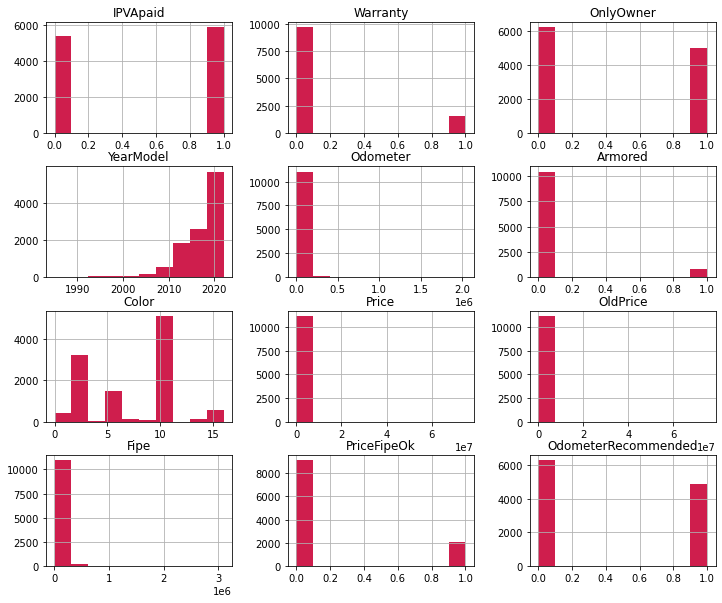

In [46]:
# Gráfico Histogramas 
df_small = df_cars_class.copy()

# Definindo as configurações do Gráfico
df_small.hist(color="#cf1e4d", figsize=(12,10))

plt.show()

## 5. Criação de Modelos de Machine Learning

Nessa seção iremos aplicar alguns algoritmos de Machine Learning para analisar a classificação do nosso modelo.

### 5.1 Analisando e preparando os dados

Criando uma coluna para representar as classes 0 e 1, para classificar os carros como "GoodDeal" (1 - Sim ou 2 - Não).
Baseado no valor da Coluna booleana GoodDeal.

In [47]:
# criando coluna Class
df_cars_class['Class'] = (df_cars['GoodDeal']).astype('int64')

# Deletando a coluna GoodDeal, pois agora seu valor está na coluna Class
del df_cars_class['GoodDeal']

Exibindo a quantidade de carros de cada classe (se é ou não um bom negócio).

In [48]:
df_cars_class.groupby('Class')['PriceFipeOk'].count()


Class
0    10466
1      743
Name: PriceFipeOk, dtype: int64

Exibindo informações do DataFrame.

In [49]:
df_cars_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11209 entries, 0 to 11975
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IPVApaid             11209 non-null  int64  
 1   Warranty             11209 non-null  int64  
 2   OnlyOwner            11209 non-null  int64  
 3   YearModel            11209 non-null  int64  
 4   Odometer             11209 non-null  float64
 5   Armored              11209 non-null  int32  
 6   Color                11209 non-null  int32  
 7   Price                11209 non-null  float64
 8   OldPrice             11209 non-null  float64
 9   Fipe                 11209 non-null  float64
 10  PriceFipeOk          11209 non-null  int64  
 11  OdometerRecommended  11209 non-null  int64  
 12  Class                11209 non-null  int64  
dtypes: float64(4), int32(2), int64(7)
memory usage: 1.4 MB


Definindo as variáveis que serão utilizadas para os modelos.

Onde:
X= todas as colunas, removendo apenas a coluna de classificação "Class".
y= pega somente a coluna de classificação "Class".

In [50]:
X = df_cars_class.drop('Class', axis=1)
y = df_cars_class['Class']

Dividindo base de Teste e de Treino. 

Consideramos 70% da base para treino e 30% para teste.

In [51]:
# Divide o DataFrame em teste e treino
# 70% treino
# 30% teste
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.70, test_size=0.30, stratify=y)

### 5.2 Aplicando algoritmos de classificação

Serão aplicados os seguintes algoritmos para classficação do nosso modelo: KNN (K-Nearest Neighbor) e .

### 5.2.1. KNN (K-Nearest Neighbor) 

Nessa seção será apresentado a utilização do algoritmo KNN para classificação dos dados.

O algoritmo K-mais próximos vizinhos (KNN) é um tipo de algoritmo de ML supervisionado que pode ser usado tanto para classificação quanto para problemas preditivos de regressão. No entanto, é usado principalmente para problemas de previsão de classificação na indústria

Criando instância KNeighborsClassifier

In [52]:
# Instânciando KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)

KNeighborsClassifier()

#### 5.2.1.1 Acurácia

Acurácia da base de treinamento.

In [53]:
knn.score(train_X, train_y)

0.9646953861840428

Acurácia de previsão.

Fazendo a previsão dos dados utilizamos a função predict.

In [54]:
# Usamos o método predict() para prever os valores para os dados de teste.
pred_knn = knn.predict(test_X)

In [55]:
# Acurácia de Previsão
accuracy_score(test_y, pred_knn)

0.952126077906631

#### 5.2.1.2. Analisando e validando os resultados obtidos - KNeighborsClassifier

In [56]:
result = confusion_matrix(test_y, pred_knn)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, pred_knn)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,pred_knn)
print("Accuracy:",result2)

Confusion Matrix:
[[3100   40]
 [ 121  102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3140
           1       0.72      0.46      0.56       223

    accuracy                           0.95      3363
   macro avg       0.84      0.72      0.77      3363
weighted avg       0.95      0.95      0.95      3363

Accuracy: 0.952126077906631


Na coluna de Acurácia (accuracy), podemos ver o quanto o modelo acertou das previsões possíveis.

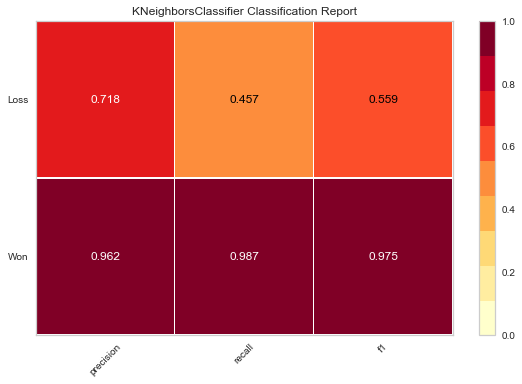

In [76]:
# Instanciando o modelo de classificação e o objeto visualizer
visualizer = ClassificationReport(knn, classes=['Won','Loss'])
visualizer.fit(train_X, train_y) # adicionando o resultado do modelo no objeto visualizer
visualizer.score(test_X, test_y) # adicionando resultados da base de teste
g = visualizer.poof() # desenha o gráfico

#### 5.2.1.3 Matriz de Confusão

Dos 3140 valores o modelo previu como sendo classe 0, 3108 elementos foram classificados corretamente e 32 foi classificado como sendo classe 1, ou seja, nesse caso o modelo errou apenas 32 registros na previsão da classe 0.

In [57]:
# A matriz de confusão é uma tabela que mostra as frequências classificação para cada classe do modelo.
print (pd.crosstab(test_y, pred_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        3100   40  3140
1         121  102   223
All      3221  142  3363


#### 5.2.1.4 Otimizando o parâmetro k utilizando o GridSearch

Gerando uma lista com valores de 1 a 25 para testar qual será o melhor valor para o parâmetro K.



In [58]:
# Definindo a lista de valores.
k_list = list(range(1,26))

In [59]:
# Colocamos os valores em um dicionário
params = dict(n_neighbors=k_list)

Para instanciar o objeto GridSearch passamos o nosso modelo, a lista com os valores para o número de vizinhos, cv (número de dobras para a validação cruzada) e o scoring que é uma das métricas de avaliação dos modelos de classificação.


In [60]:
# Instanciando o objeto GridSearch
grid_knn = GridSearchCV(knn, params, cv=5, scoring='accuracy')


Treinando o objeto

In [61]:
grid_knn.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25]},
             scoring='accuracy')

In [62]:
print("Melhores parâmetros {} com o valor de acurácia {} ".format(grid_knn.best_params_,grid_knn.best_score_))


Melhores parâmetros {'n_neighbors': 1} com o valor de acurácia 0.9550365601567734 


In [63]:
pd.DataFrame(grid_knn.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.955037,0.007479,{'n_neighbors': 1}
1,0.949594,0.006010,{'n_neighbors': 2}
2,0.951022,0.007253,{'n_neighbors': 3}
3,0.949237,0.004977,{'n_neighbors': 4}
4,0.947543,0.004903,{'n_neighbors': 5}
5,0.946383,0.003733,{'n_neighbors': 6}
6,0.945758,0.003670,{'n_neighbors': 7}
7,0.943706,0.001877,{'n_neighbors': 8}
8,0.943438,0.003132,{'n_neighbors': 9}
9,0.941208,0.003437,{'n_neighbors': 10}


Visualizando de forma Gráfica

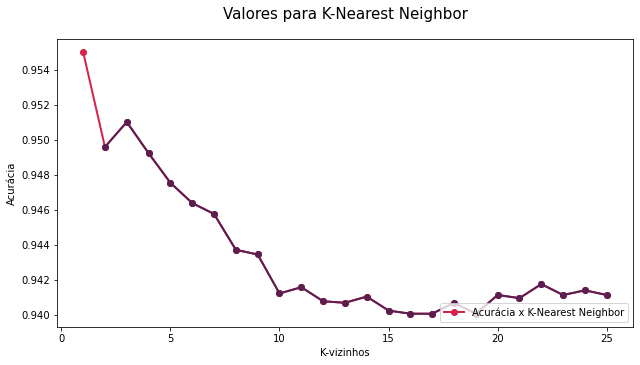

In [64]:
# Gráfico melhores parâmetros para K

# Pega os valores apurados de acurácia média no modelo de teste
scores = grid_knn.cv_results_['mean_test_score']

fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando gráfico
eixo.plot(k_list, scores, color= '#d5224a', lw=2, marker = 'o')

# Adicionando cor de destaque para os valores de K maiores ou iguais a 2, esse valor foi apurado anteriormente em n_neighbors.
k_list_aux = []
scores_aux = []
for i in range(0, len(k_list)):    
    if k_list[i] >= 2:
        k_list_aux.append(k_list[i])
        scores_aux.append(scores[i])

eixo.plot(k_list_aux, scores_aux, color= '#5c1e51', lw=2, marker = 'o')


# Alterando Título e Labels
eixo.set_title('Valores para K-Nearest Neighbor', fontsize=15, pad=20)
eixo.set_ylabel('Acurácia')
eixo.set_xlabel('K-vizinhos')

# Adicionando Legenda
eixo.legend(['Acurácia x K-Nearest Neighbor'], loc = 'lower right')


Como podemos ver no gráfico nossas taxas de erro tendem a ser minimizadas com um K valor de aproximadamente 1. Isso significa que 1 é uma escolha adequada para K que equilibra simplicidade e poder preditivo.

No gráfico foi exibido em cor destacada apartir de K = 1, identificando de forma visual que a erros tendem a ser normalizados.

### 5.2.2. Random Forest Classifier

Nessa seção será apresentado a utilização do algoritmo Random Forest Classifier para classificação dos dados.

A floresta aleatória é um algoritmo de aprendizado supervisionado que é usado tanto para classificação quanto para regressão. Porém, ele é usado principalmente para problemas de classificação. Como sabemos que uma floresta é formada por árvores e mais árvores significa floresta mais robusta. Da mesma forma, o algoritmo de floresta aleatório cria árvores de decisão em amostras de dados e, em seguida, obtém a previsão de cada uma delas e, finalmente, seleciona a melhor solução por meio de votação. É um método de conjunto melhor do que uma única árvore de decisão porque reduz o sobreajuste ao calcular a média do resultado.

Agora treinaremos o modelo com a classe RandomForestClassifier.

In [65]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(train_X, train_y)

RandomForestClassifier(n_estimators=50)

#### 5.2.2.1 Acurácia

Acurácia da base de treinamento.

In [66]:
rfc.score(train_X, train_y)

1.0

Fazendo as previsões

In [67]:
pred_rfc = rfc.predict(test_X)

#### 5.2.2.2. Analisando e validando os resultados obtidos - DecisionTreeClassifier

In [68]:
result = confusion_matrix(test_y, pred_rfc)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, pred_rfc)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,pred_rfc)
print("Accuracy:",result2)

Confusion Matrix:
[[3089   51]
 [ 104  119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3140
           1       0.70      0.53      0.61       223

    accuracy                           0.95      3363
   macro avg       0.83      0.76      0.79      3363
weighted avg       0.95      0.95      0.95      3363

Accuracy: 0.9539101992268808


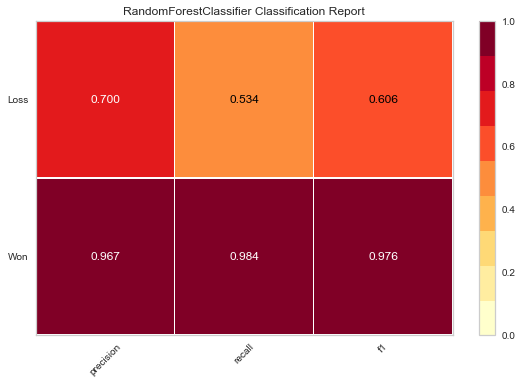

In [78]:
# Instanciando o modelo de classificação e o objeto visualizer
visualizer = ClassificationReport(rfc, classes=['Won','Loss'])
visualizer.fit(train_X, train_y) # adicionando o resultado do modelo no objeto visualizer
visualizer.score(test_X, test_y) # adicionando resultados da base de teste
g = visualizer.poof() # desenha o gráfico

#### 5.2.2.3. Matriz de Confusão

Dos 3140 valores o modelo previu como sendo classe 0, 3096 elementos foram classificados corretamente e 44 foi classificado como sendo classe 1, ou seja, nesse caso o modelo errou apenas 44 registros na previsão da classe 0.

In [69]:
# A matriz de confusão é uma tabela que mostra as frequências classificação para cada classe do modelo.
print (pd.crosstab(test_y, pred_rfc, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        3089   51  3140
1         104  119   223
All      3193  170  3363


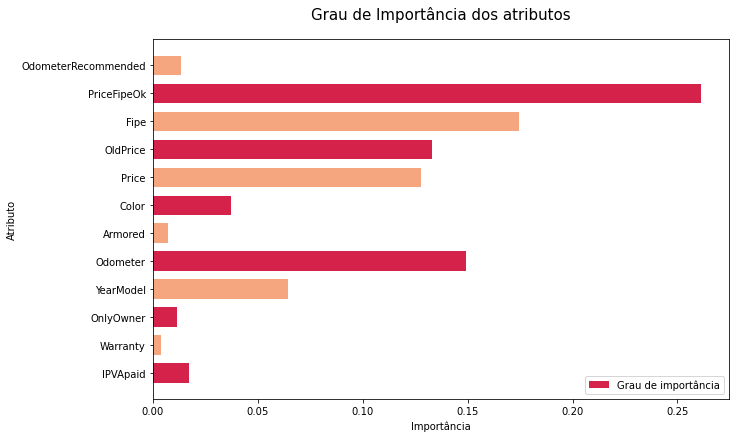

In [70]:
# Gráfico Grau de Importância dos atributos

# Configurando gráfico
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices
indice = np.arange(len(X.columns))

eixo.barh(indice, rfc.feature_importances_, align='center', height=0.7,  tick_label=X.columns, color=["#d5224a", '#f6a67e'])

# Alterando Título e Labels
eixo.set_title('Grau de Importância dos atributos', fontsize=15, pad=20)
eixo.set_xlabel('Importância')
eixo.set_ylabel('Atributo')

eixo.set_yticks(indice)

# Adicionando Legenda
eixo.legend(['Grau de importância'], loc = 'lower right')

Gráfico Curva ROC

In [71]:
# Váriaveis para o modelo RandomForestClassifier
y_proba_rfc = rfc.predict_proba(test_X)[:,1]
fpr_rfc, tpr_rfc, thresholds = roc_curve(test_y, y_proba_rfc)

In [72]:
# Váriaveis para o modelo KNeighborsClassifier
y_proba_knn = knn.predict_proba(test_X)[:,1]
fpr_knn, tpr_knn, thresholds = roc_curve(test_y, y_proba_knn)

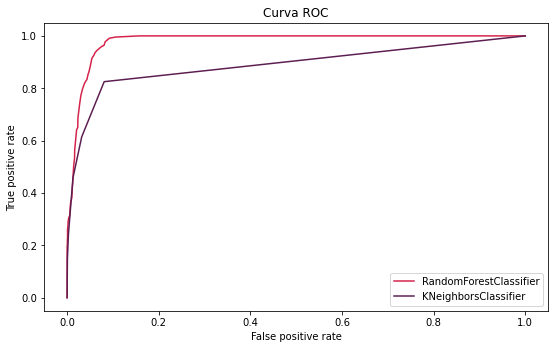

In [73]:
#Exibindo Gráfico Curva ROC

# Configurando gráfico
fig = plt.figure(figsize=(7,4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(fpr_rfc, tpr_rfc, label='RandomForestClassifier', color= '#d5224a')
eixo.plot(fpr_knn, tpr_knn, label='KNeighborsClassifier', color= '#5c1e51')

# Alterando Título e Labels
eixo.set_xlabel('False positive rate')
eixo.set_ylabel('True positive rate')
eixo.set_title('Curva ROC')

# Adicionando Legenda
eixo.legend(loc='best')

Text(0.5, 0, 'Quilometragem')

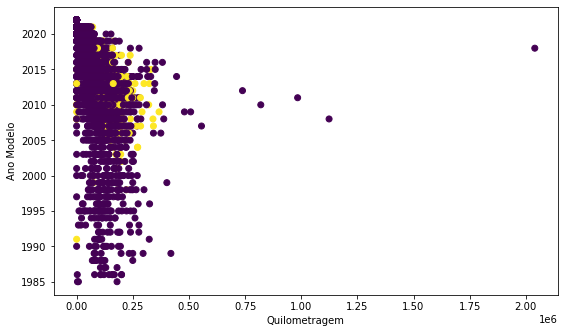

In [74]:

# Gráfico Grau de Dispersão

# Configurando gráfico
fig = plt.figure(figsize=(7,4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.scatter(X['Odometer'],X['YearModel'], c=y)

eixo.set_ylabel("Ano Modelo")
eixo.set_xlabel("Quilometragem")
